In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
operation=pd.read_csv('D:\\ML\\Data set ML algo\\RecommendationEngineData_new.csv')
operation.head(2)

,POST_ID,POST_STRING_UNIQUE_ID,CREATED_AT,Creator_Name,Caption,Length,Watch_Views,Total_Watch_time,Average_Watch_time,10_Sec_Watch_Time,...,Execution_Reach,Spammy_Views,Love,Comment,Share,Report_Abuse,Repost_Count,Creation_type,ContentType,LANGUAGE_NAME
0,5251588,ec7e9ef3246874618d617623ee07451c,4/22/2020 19:51,Nojoto News,Know who loved your story | Tag Nojotians #Noj...,51,61196,732610,12.0,584192,...,1000000,28445,1720,108,35,0,73,Uploaded,Video,English
1,5539448,e38e34aa65c0c7c2ed42426fe92e6419,5/10/2020 18:00,Nojoto News,Details for Day 1 (Monday) :- \nExpress Karo N...,168,2751,33002,12.0,25716,...,50000,1037,130,10,4,0,17,Uploaded,Video,English


In [3]:
operation.shape

(1000, 21)

In [4]:
operation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
POST_ID                  1000 non-null int64
POST_STRING_UNIQUE_ID    1000 non-null object
CREATED_AT               1000 non-null object
Creator_Name             1000 non-null object
Caption                  996 non-null object
Length                   1000 non-null int64
Watch_Views              1000 non-null int64
Total_Watch_time         1000 non-null int64
Average_Watch_time       1000 non-null float64
10_Sec_Watch_Time        1000 non-null int64
10_Sec_Views             1000 non-null int64
Execution_Reach          1000 non-null int64
Spammy_Views             1000 non-null int64
Love                     1000 non-null int64
Comment                  1000 non-null int64
Share                    1000 non-null int64
Report_Abuse             1000 non-null int64
Repost_Count             1000 non-null int64
Creation_type            1000 non-null object
ContentType              1000 non

In [5]:
operation.describe()

,POST_ID,Length,Watch_Views,Total_Watch_time,Average_Watch_time,10_Sec_Watch_Time,10_Sec_Views,Execution_Reach,Spammy_Views,Love,Comment,Share,Report_Abuse,Repost_Count
count,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,5.238019e+06,104.448000,2846.651000,4.301675e+04,14.165800,35449.142000,984.14100,11383.00000,883.922000,242.542000,39.740000,4.483000,0.0,8.661000
std,2.590702e+05,87.586384,4599.174397,7.344618e+04,3.929419,61858.176108,1667.32367,33979.30111,1480.606192,229.016141,36.382194,10.604535,0.0,9.156961
min,1.090611e+06,0.000000,148.000000,1.431000e+03,5.300000,737.000000,29.00000,1000.00000,53.000000,37.000000,0.000000,0.000000,0.0,0.000000
25%,5.125160e+06,0.000000,755.250000,9.142500e+03,11.375000,6808.500000,214.75000,5000.00000,267.750000,113.000000,14.000000,0.000000,0.0,3.000000
50%,5.309428e+06,101.000000,1356.500000,1.985050e+04,13.600000,15964.000000,445.50000,5000.00000,459.000000,168.000000,28.000000,1.000000,0.0,6.000000
75%,5.399322e+06,180.250000,2873.750000,4.339400e+04,16.300000,35946.000000,964.00000,10000.00000,868.250000,277.250000,55.000000,4.000000,0.0,12.000000
max,5.540220e+06,320.000000,61196.000000,1.058837e+06,31.700000,929662.000000,21149.00000,1000000.00000,28445.000000,2657.000000,283.000000,150.000000,0.0,91.000000


In [6]:
#What should be the top 10 content

In [7]:
from sklearn import preprocessing


In [8]:
scaler =preprocessing.MinMaxScaler()

In [9]:
operation['w_views']=scaler.fit_transform(operation[['Watch_Views']])

In [10]:
operation['a_v_t']=scaler.fit_transform(operation[['Average_Watch_time']])

In [11]:
operation['10_s_v']=scaler.fit_transform(operation[['10_Sec_Views']])

In [12]:
operation['E_R']=scaler.fit_transform(operation[['Execution_Reach']])

In [13]:
operation['S_V']=scaler.fit_transform(operation[['Spammy_Views']])

In [14]:
operation['lv']=scaler.fit_transform(operation[['Love']])

In [15]:
operation['cmt']=scaler.fit_transform(operation[['Comment']])

In [16]:
operation['sh']=scaler.fit_transform(operation[['Share']])

In [17]:
operation['R_C']=scaler.fit_transform(operation[['Repost_Count']])

In [18]:
operation['R_A']=scaler.fit_transform(operation[['Report_Abuse']])

In [19]:
operation['score']=operation['w_views']+operation['a_v_t']+operation['10_s_v']+\
operation['E_R']-operation['S_V']+operation['lv']+operation['cmt']+\
operation['sh']+operation['R_C']-operation['R_A']

In [20]:
top_20=operation.sort_values('score',ascending=False).head(20)

In [21]:
import matplotlib.pyplot as plt

In [22]:
plt.figure(figsize=(10,6),dpi=100)

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

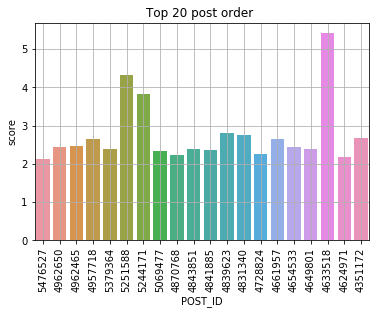

In [23]:
sns.barplot(x='POST_ID',y='score',data=top_20,
           order=top_20.sort_values(by='CREATED_AT',ascending=False)['POST_ID'])
plt.grid()
plt.title('Top 20 post order ')
plt.xticks(rotation=90)

In [24]:
top_10 = operation[operation.POST_ID.isin(top_20.sort_values(by = 'CREATED_AT', ascending = False).head(10)['POST_ID']\
                                .to_list())]

In [25]:

top_10.reset_index(drop = True, inplace = True)
top_10.iloc[:,0:18]

,POST_ID,POST_STRING_UNIQUE_ID,CREATED_AT,Creator_Name,Caption,Length,Watch_Views,Total_Watch_time,Average_Watch_time,10_Sec_Watch_Time,10_Sec_Views,Execution_Reach,Spammy_Views,Love,Comment,Share,Report_Abuse,Repost_Count
0,5251588,ec7e9ef3246874618d617623ee07451c,4/22/2020 19:51,Nojoto News,Know who loved your story | Tag Nojotians #Noj...,51,61196,732610,12.0,584192,21149,1000000,28445,1720,108,35,0,73
1,5476527,be65e3d72d5e21b5d2b324adf5d08730,5/6/2020 11:15,कवि राहुल पाल,Old Man - Lost Smile\n#StoryOnline \n#nojotofi...,187,1901,40310,21.2,35967,776,10000,668,336,209,8,0,51
2,5379364,6e44130461633f7b43456469c6355703,4/30/2020 14:00,Nojoto News,अभी तो बस ज़िन्दगी के सेट से पैकअप हुआ है। हिम...,67,10808,138849,12.8,111024,3418,50000,3444,716,115,107,0,42
3,5244171,fb6d818f7bf2bd153c69897b8f299ce0,4/22/2020 12:19,कवि राहुल पाल,#MessageForModi\ncomedy -only for fun \nनिवेदन...,236,19197,483765,25.2,436495,8274,50000,4965,1052,283,58,0,65
4,5069477,679715d4c44fed79150d3ff2e7e601a9,4/12/2020 20:00,Nojoto News,Details for Day 1 (Monday):-\nExpress Karo Na\...,128,24508,440849,18.0,383910,10203,80000,8419,917,66,25,0,41
5,4962465,c92dc007198dbbaa86f3014992fd6bb2,4/6/2020 17:27,Sona Uniyal,#PoetryOnline #SayaniChidiya #SonaUniyal #Mom ...,240,19695,252367,12.8,187444,5642,50000,4841,1045,240,25,0,28
6,4962650,066ca277b6748b1f230d954463ca6155,4/6/2020 17:39,Nalini,#poetryonline #kinnar #nojotohindi #hindipoetr...,137,16897,244298,14.5,197238,6810,50000,3646,1183,163,35,0,30
7,4843851,64393f6050389d16e1a6b14c47deffba,3/30/2020 22:10,Sourabh shresth,https://youtu.be/SOzwxVsPx-8 kuch musibat hai...,0,17202,294629,17.1,258439,7879,50000,4753,1309,119,29,0,28
8,4957718,7ff0cd9c2ba0f07ef312b4a349af9b03,4/6/2020 12:37,NISHU MISHRA,#poetryonline,213,9787,222666,22.8,196749,3991,25000,2687,1057,218,44,0,23
9,4870768,a4ef677a7c86168732381a337292062e,4/1/2020 13:25,Bhawana Mehra,#StoryOnline #funny #comedy #masti #life #happy,223,11974,265411,22.2,234549,5103,25000,2958,850,158,16,0,23


In [26]:
plt.figure(figsize=(16,9),dpi=200)

<Figure size 3200x1800 with 0 Axes>

<Figure size 3200x1800 with 0 Axes>

In [27]:
correlation_plot=operation[['Watch_Views','Average_Watch_time','10_Sec_Views','Execution_Reach','Spammy_Views','Love','Comment','Share','Repost_Count','Report_Abuse']].corr()

In [28]:
mask = np.zeros_like(correlation_plot, dtype=np.bool)

In [29]:
mask[np.triu_indices_from(mask)] = True

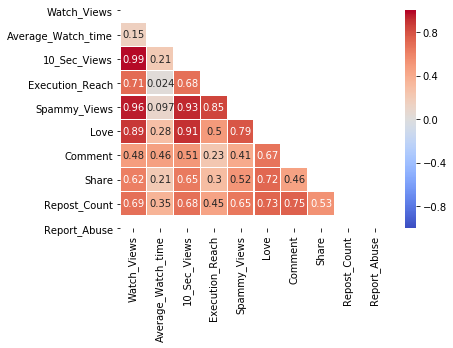

In [30]:
sns.heatmap(correlation_plot,
            square=False, 
            linewidth=.1,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask)
plt.show()

In [31]:
#As shown in the correlation plot above, a lot of these variables are highly correlation with watch views. Thus stating that they're important as metrics in a recommendation system.

# Cohort analysis::
A cohort is a group of people sharing something in common,such as sign up date date to an app, the month of the first purchase,geographical location e.t.c and so on. In cohort analysis we track the these group of user uset over time to identify some pattern and the behaviour. 

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.colors as mcolors

In [33]:
df=pd.read_csv('D:\\ML\\Data set ML algo\\retail.csv',encoding= 'unicode_escape',dtype={'CustomerID': str,
                          'InvoiceID': str},
                   parse_dates=['InvoiceDate'], 
                   infer_datetime_format=True)

In [34]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
Invoice        541910 non-null object
StockCode      541910 non-null object
Description    540456 non-null object
Quantity       541910 non-null int64
InvoiceDate    541910 non-null datetime64[ns]
Price          541910 non-null float64
Customer ID    406830 non-null float64
Country        541910 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [36]:
df.dropna(subset=['Customer ID'],inplace=True)

# EDA is always a very important step of any analysis, as we discover the specifics of the dataset we are working with.

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,406830.0,12.061276,248.693065,-80995.0,2.00,5.00,12.00,80995.0
Price,406830.0,3.460507,69.315080,0.0,1.25,1.95,3.75,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.0,13953.00,15152.00,16791.00,18287.0


# we calculate an aggregate metric indicating how many orders were placed by each customer.

In [38]:
n_orders = df.groupby(['Customer ID'])['Invoice'].nunique()

mult_orders_perc = np.sum(n_orders > 1) / df['Customer ID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

69.97% of customers ordered more than once.


# we look at the distribution of the number of orders per customer. For that, we can reuse the previously aggregated data (n_orders) and plot the data on a histogram.

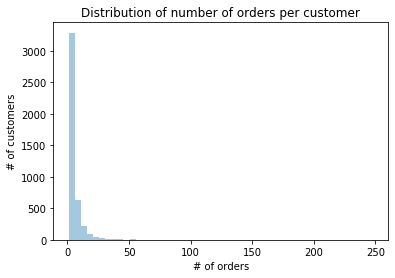

In [39]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

# As the first step, we keep only the relevant columns and drop duplicated values — one order (indicated by InvoiceNo) can contain multiple items (indicated by StockCode)

In [40]:
df = df[['Customer ID', 'Invoice', 'InvoiceDate']].drop_duplicates()

In [41]:
df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df['cohort'] = df.groupby('Customer ID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M') 

Then, we aggregate the data per cohort and order_month and count the number of unique customers in each group. Additionally, we add the period_number, which indicates the number of periods between the cohort month and the month of the purchas

In [43]:
from operator import attrgetter
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('Customer ID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

The next step is to pivot the df_cohort table in a way that each row contains information about a given cohort and each column contains values for a certain period.

In [44]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

To obtain the retention matrix, we need to divide the values each row by the row's first value, which is actually the cohort size — all customers who made their first purchase in the given month.



In [45]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

we plot the retention matrix as a heatmap. Additionally, we wanted to include extra information regarding the cohort size.

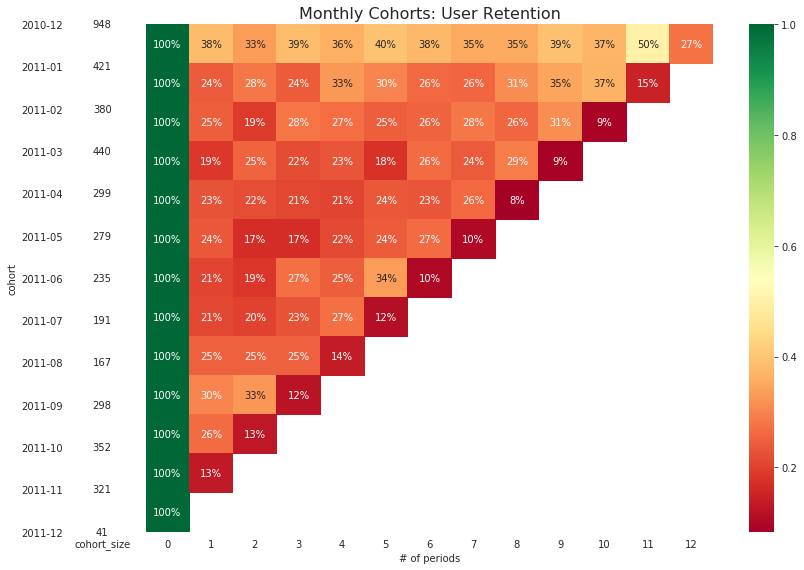

In [47]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()